# Purpose
- To explore the t-test and it's assumptions

# Background

To perform null-hypothesis significant testing with the t-test we need:
- A population parameter to test: $\mu$
- An $H_0$: $\mu = something$
- A test statistic: $t$
- A null distribution for the test statistic: $t \sim t_{df} \sim t_{n-1}$, where $n$ is the sample size

The t-test, then, uses the $t$ statistic. This $t$ is derived from:
- starting from $\bar{X}$, the sample mean, as statistic
- since via the central limit theorem, $\bar{X} \sim AN(\mu, \frac{\sigma^2}{n})$, we can re-arrange to get a statistic that is distributed as a Normal with 0 mean and 1 variance: $\frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}} \sim AN(0,1)$
- This would be a Z statistic, but there's an issue: most of the times we can't know the population variance $\sigma^2$ so we replace it with the sample variance $S^2$ which is: $S^2 = \frac{\sum\limits_{i=1}^{N}(X_i - \bar{X})^2}{n-1}$
- Now, to this statistic $\frac{\bar{X} - \mu}{\frac{S}{\sqrt{n}}} \sim AN(0,1)$ we call $t$ and it's parametrized with the degrees of freedom $df$
- These degrees of freedom depend only on the sample size $n$ and are equal to $df = n-1$ instead of just $n$ because for the $t$ statistic we must "use" one $df$ to calculate the sample mean $\bar{X}$ in order to estimate $S$ (basically $t$ is actually a function of 2 random variables, $S$ and $\bar{X}$)
- The additional randomness given by the 2 random variables makes $t$ follow a similar distribution as $Z$ but with longer tails
- We call this distribution, the $t$ distribution and it's the null distribution used for the t-test

# Import packages

In [3]:
using Pkg
Pkg.status()

Status `/mnt/weird_vol/projects/playaround/Notebooks-Research/Statistics/Project.toml`
  [a93c6f00] DataFrames v1.6.1
  [31c24e10] Distributions v0.25.108
  [09f84164] HypothesisTests v0.11.0
  [91a5bcdd] Plots v1.40.4
  [f3b207a7] StatsPlots v0.15.7


In [4]:
using Random
using Distributions
using StatsPlots
using DataFrames
using Printf
using HypothesisTests

# t-test

In [5]:
Random.seed!(1)

μ = 50
sample_size = 20

model = Normal(45, 10)
x = rand(model, sample_size)

display(mean(x))

43.71734560485239

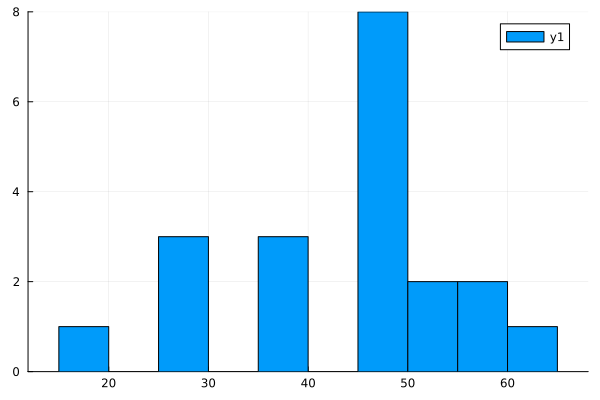

In [6]:
histogram(x, bins=10)

# By package

In [20]:
display("t-test via a package")
ttest = OneSampleTTest(x, μ)
display(ttest)

"t-test via a package"

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         50
    point estimate:          43.7173
    95% confidence interval: (38.48, 48.96)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0213

Details:
    number of observations:   20
    t-statistic:              -2.5097130000252785
    degrees of freedom:       19
    empirical standard error: 2.5033357977921495


# By Hand

## Calculate the t-statistic

In [13]:
n = sample_size
X̄ = sum(x) / n
S² = (sum((x .- X̄).^2)) / (n - 1)
S = √S²

t = (X̄ - μ) / (S / √n)

-2.5097130000252785

In [12]:
df = n-1

model = TDist(df)
pval_2sided = (1-cdf(model, -t) + cdf(model, t))  # The area under the t-distribution that is more extreme than t, given that we didn't know the directionality of t at H0 (2-sided test)

0.021299520091725414

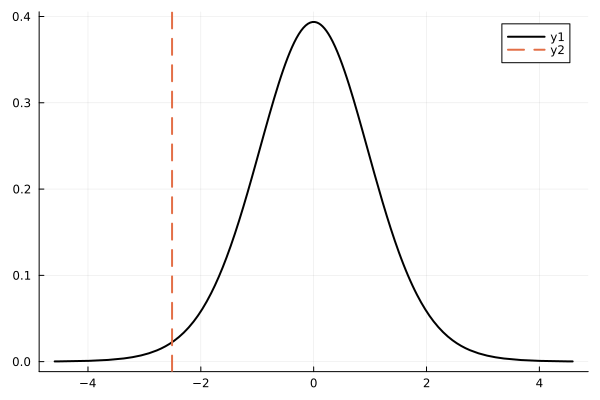

In [23]:
plot(model, lc=:black, lw=2)
vline!([t], lw=2, ls=:dash)

In [ ]:
# TODO: plot the t-dist with the t value and shaded by the 5% significance regions in both tails

plot!(x[ix], y[ix], fillrange = zero(x[ix]), fc=:blues)